In [1]:
# SVM RBF
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
dataset = pd.read_csv('/content/ConsideredMeanSTDP1Authors.csv')

# Features & target variables
X = dataset.iloc[:, 1:25].values
y = dataset.iloc[:, 26].values

# Hyperparameters
svm_rbf_parameters = {
    'C': [10**i for i in range(-5, 5)],
    'gamma': [10**i for i in range(-5, 5)]
}

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize
svm_rbf_accuracy_scores = []
svm_rbf_precision_scores = []
svm_rbf_recall_scores = []
svm_rbf_f1_scores = []

# Confusion matrix (with two rows and two columns)
overall_conf_matrix = np.zeros((2, 2), dtype=int)

# best model
best_svm_rbf_model = None
best_svm_rbf_score = 0.0

# cross-validation
for train_index, test_index in outer_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # SVM RBF
    svm_rbf_classifier = SVC(kernel='rbf', random_state=42)
    svm_rbf_grid_search = GridSearchCV(svm_rbf_classifier, svm_rbf_parameters, cv=inner_cv)
    svm_rbf_grid_search.fit(X_train_fold, y_train_fold)
    svm_rbf_best_params = svm_rbf_grid_search.best_params_
    svm_rbf_best_model = SVC(kernel='rbf', random_state=42, **svm_rbf_best_params)

    # Fit best model
    svm_rbf_best_model.fit(X_train_fold, y_train_fold)

    # test set
    svm_rbf_predictions = svm_rbf_best_model.predict(X_test_fold)

    # Append
    svm_rbf_accuracy_scores.append(accuracy_score(y_test_fold, svm_rbf_predictions))
    svm_rbf_precision_scores.append(precision_score(y_test_fold, svm_rbf_predictions))
    svm_rbf_recall_scores.append(recall_score(y_test_fold, svm_rbf_predictions))
    svm_rbf_f1_scores.append(f1_score(y_test_fold, svm_rbf_predictions))

    # Update overall confusion matrix with current fold's results
    fold_conf_matrix = confusion_matrix(y_test_fold, svm_rbf_predictions)
    overall_conf_matrix += fold_conf_matrix

    # Store the best model
    current_score = accuracy_score(y_test_fold, svm_rbf_predictions)
    if current_score > best_svm_rbf_score:
        best_svm_rbf_score = current_score
        best_svm_rbf_model = svm_rbf_best_model

# Save
if best_svm_rbf_model is not None:
    joblib.dump(best_svm_rbf_model, 'best_svm_rbf_model.pkl')

# Calculate
svm_rbf_average_accuracy = np.mean(svm_rbf_accuracy_scores)
svm_rbf_average_precision = np.mean(svm_rbf_precision_scores)
svm_rbf_average_recall = np.mean(svm_rbf_recall_scores)
svm_rbf_average_f1 = np.mean(svm_rbf_f1_scores)

# Print
print("\nSVM RBF Test Set:")
print("Accuracy:", svm_rbf_average_accuracy)
print("Precision:", svm_rbf_average_precision)
print("Recall:", svm_rbf_average_recall)
print("F1-score:", svm_rbf_average_f1)


SVM RBF Test Set:
Accuracy: 0.984375
Precision: 0.969864081996435
Recall: 1.0
F1-score: 0.9845147907647908



Overall Confusion Matrix:
[[159   5]
 [  0 156]]


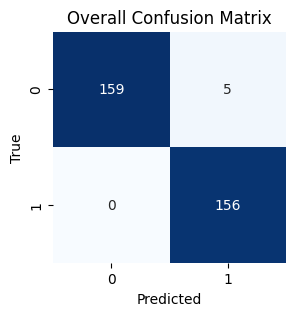

In [2]:
# Display the confusion matrix
print("\nOverall Confusion Matrix:")
print(overall_conf_matrix)

# Plot the overall confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(overall_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()